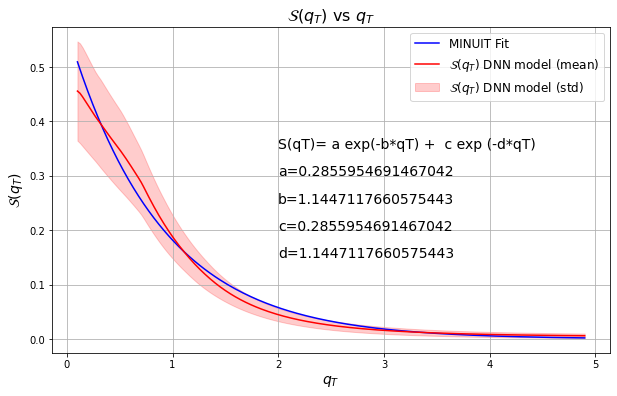

In [16]:
#### Formula 1 (F1) ######################
### Fit with S(qT)= a exp(-b*qT) +  c exp (-d qT) ########


import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT, a,b,c,d):
    return a * np.exp(-b*qT) + c * np.exp(-d*qT)


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(a,b,c,d):
    yth = model_function(qT,a,b,c,d)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

a_guess = 0.4
b_guess = 0.4  
c_guess = 0.4  
d_guess = 0.4  
minuit = Minuit(chi2, a=a_guess, b=b_guess, c=c_guess, d=d_guess)


minuit.migrad()
minuit.hesse()

a_solution = minuit.values["a"]
b_solution = minuit.values["b"]
c_solution = minuit.values["c"]
d_solution = minuit.values["d"]


SqT_model = np.array(model_function(qT,a_solution,b_solution,c_solution,d_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.text(2.0,0.35,'S(qT)= a exp(-b*qT) +  c exp (-d*qT)',fontsize=14)
plt.text(2.0,0.3,f'a={a_solution}',fontsize=14)
plt.text(2.0,0.25,f'b={b_solution}',fontsize=14)
plt.text(2.0,0.2,f'c={c_solution}',fontsize=14)
plt.text(2.0,0.15,f'd={d_solution}',fontsize=14)
plt.plot(qT, SqT_model, label='MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_SqT_F1.pdf')

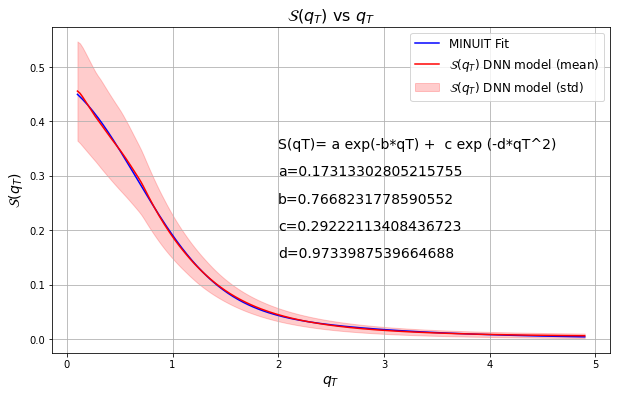

In [17]:
#### Formula 2 (F2) ######################
### Fit with S(qT)= a exp(-b*qT) +  c exp (-d qT^2) ########


import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT, a,b,c,d):
    return a * np.exp(-b*qT) + c * np.exp(-d*qT*qT)


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(a,b,c,d):
    yth = model_function(qT,a,b,c,d)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

a_guess = 0.4
b_guess = 0.4  
c_guess = 0.4  
d_guess = 0.4  
minuit = Minuit(chi2, a=a_guess, b=b_guess, c=c_guess, d=d_guess)


minuit.migrad()
minuit.hesse()

a_solution = minuit.values["a"]
b_solution = minuit.values["b"]
c_solution = minuit.values["c"]
d_solution = minuit.values["d"]


SqT_model = np.array(model_function(qT,a_solution,b_solution,c_solution,d_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.text(2.0,0.35,'S(qT)= a exp(-b*qT) +  c exp (-d*qT^2)',fontsize=14)
plt.text(2.0,0.3,f'a={a_solution}',fontsize=14)
plt.text(2.0,0.25,f'b={b_solution}',fontsize=14)
plt.text(2.0,0.2,f'c={c_solution}',fontsize=14)
plt.text(2.0,0.15,f'd={d_solution}',fontsize=14)
plt.plot(qT, SqT_model, label='MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_SqT_F2.pdf')

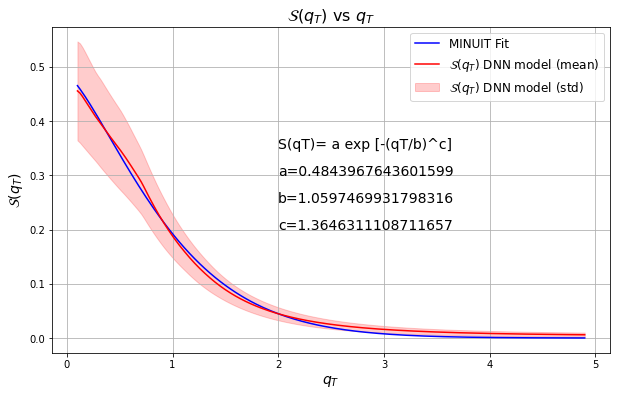

In [33]:
#### Formula 3 (F3) ######################
### Fit with S(qT)= a exp [-(qT/b)^c] ########


import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT, a,b,c):
    return a * np.exp(-(qT/b)**c)


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(a,b,c):
    yth = model_function(qT,a,b,c)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

a_guess = 0.4
b_guess = 0.4  
c_guess = 0.4  
d_guess = 0.4  
minuit = Minuit(chi2, a=a_guess, b=b_guess, c=c_guess)


minuit.migrad()
minuit.hesse()

a_solution = minuit.values["a"]
b_solution = minuit.values["b"]
c_solution = minuit.values["c"]


SqT_model = np.array(model_function(qT,a_solution,b_solution,c_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.text(2.0,0.35,'S(qT)= a exp [-(qT/b)^c]',fontsize=14)
plt.text(2.0,0.3,f'a={a_solution}',fontsize=14)
plt.text(2.0,0.25,f'b={b_solution}',fontsize=14)
plt.text(2.0,0.2,f'c={c_solution}',fontsize=14)
plt.plot(qT, SqT_model, label='MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_SqT_F3.pdf')

/tmp/ipykernel_111474/2932646029.py:11: RuntimeWarning: invalid value encountered in power
  return a * ((qT + b)**c) * np.exp(-((qT+b)**2)/(2*d**2))


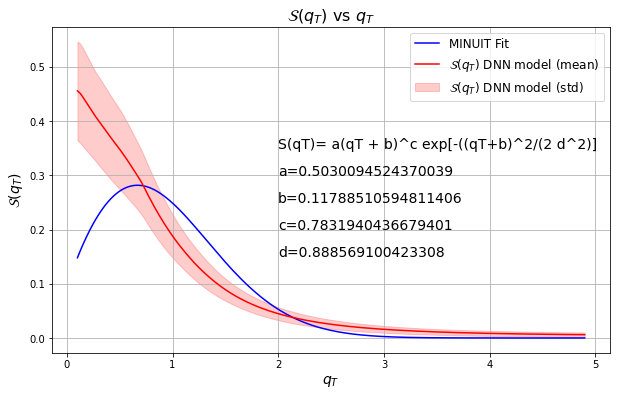

In [20]:
#### Formula 4 (F4) ######################
### Fit with S(qT)= a(qT + b)^c exp[-((qT+b)^2/(2 d^2)] ########


import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT, a,b,c,d):
    return a * ((qT + b)**c) * np.exp(-((qT+b)**2)/(2*d**2))


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(a,b,c,d):
    yth = model_function(qT,a,b,c,d)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

a_guess = 0.4
b_guess = 0.4  
c_guess = 0.4  
d_guess = 0.4  
minuit = Minuit(chi2, a=a_guess, b=b_guess, c=c_guess, d=d_guess)


minuit.migrad()
minuit.hesse()

a_solution = minuit.values["a"]
b_solution = minuit.values["b"]
c_solution = minuit.values["c"]
d_solution = minuit.values["d"]


SqT_model = np.array(model_function(qT,a_solution,b_solution,c_solution,d_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.text(2.0,0.35,'S(qT)= a(qT + b)^c exp[-((qT+b)^2/(2 d^2)]',fontsize=14)
plt.text(2.0,0.3,f'a={a_solution}',fontsize=14)
plt.text(2.0,0.25,f'b={b_solution}',fontsize=14)
plt.text(2.0,0.2,f'c={c_solution}',fontsize=14)
plt.text(2.0,0.15,f'd={d_solution}',fontsize=14)
plt.plot(qT, SqT_model, label='MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_SqT_F4.pdf')

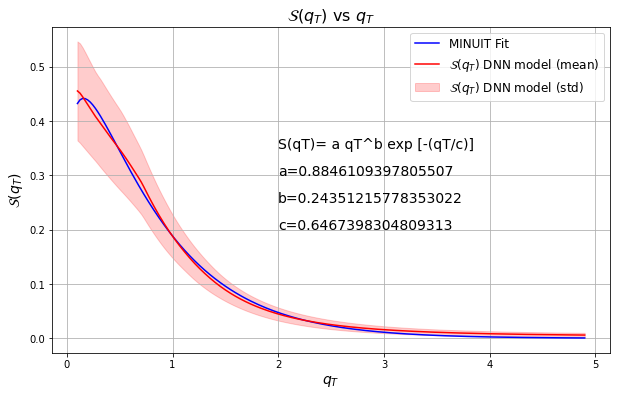

In [34]:
#### Formula 5 (F5) ######################
### Fit with S(qT)= a qT^b exp [-(qT/c)] ########


import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT, a,b,c):
    return a * (qT**b)* np.exp(-(qT/c))


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(a,b,c):
    yth = model_function(qT,a,b,c)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

a_guess = 0.4
b_guess = 0.4  
c_guess = 0.4  
d_guess = 0.4  
minuit = Minuit(chi2, a=a_guess, b=b_guess, c=c_guess)


minuit.migrad()
minuit.hesse()

a_solution = minuit.values["a"]
b_solution = minuit.values["b"]
c_solution = minuit.values["c"]


SqT_model = np.array(model_function(qT,a_solution,b_solution,c_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.text(2.0,0.35,'S(qT)= a qT^b exp [-(qT/c)]',fontsize=14)
plt.text(2.0,0.3,f'a={a_solution}',fontsize=14)
plt.text(2.0,0.25,f'b={b_solution}',fontsize=14)
plt.text(2.0,0.2,f'c={c_solution}',fontsize=14)
plt.plot(qT, SqT_model, label='MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_SqT_F5.pdf')

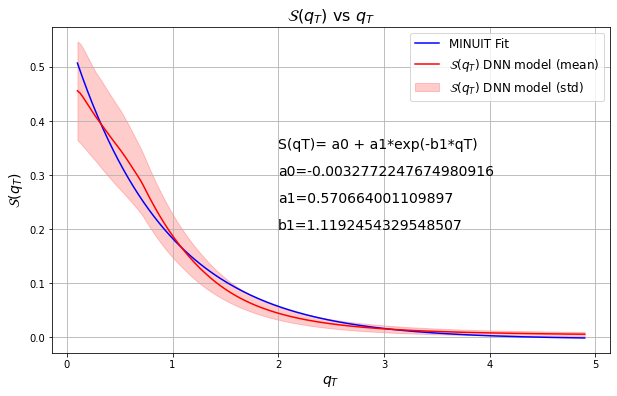

In [35]:
#### Formula 6 (F6) ######################
### Fit with S(qT)= a0 + a1*exp(-b1*qT)  ########


import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT,a0,a1,b1):
    return a0 + a1*np.exp(-b1*qT)


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(a0,a1,b1):
    yth = model_function(qT,a0,a1,b1)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

a0_guess = 0.4
a1_guess = 0.4  

b1_guess = 0.4  
 
minuit = Minuit(chi2,a0=a0_guess,a1=a1_guess,b1=b1_guess)


minuit.migrad()
minuit.hesse()

a0_solution = minuit.values["a0"]
a1_solution = minuit.values["a1"]
b1_solution = minuit.values["b1"]



SqT_model = np.array(model_function(qT,a0_solution,a1_solution,b1_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.text(2.0,0.35,'S(qT)= a0 + a1*exp(-b1*qT)',fontsize=14)
plt.text(2.0,0.3,f'a0={a0_solution}',fontsize=14)
plt.text(2.0,0.25,f'a1={a1_solution}',fontsize=14)
plt.text(2.0,0.2,f'b1={b1_solution}',fontsize=14)
plt.plot(qT, SqT_model, label='MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_SqT_F6.pdf')

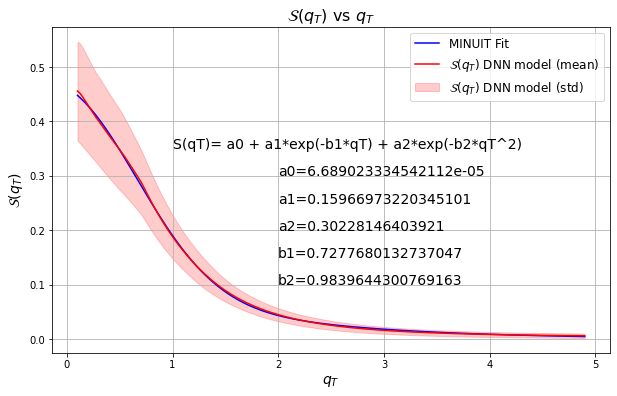

In [37]:
#### Formula 7 (F7) ######################
### Fit with S(qT)= a0 + a1*exp(-b1*qT) + a2*exp(-b2*qT^2) ########


import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT,a0,a1,a2,b1,b2):
    return a0 + a1*np.exp(-b1*qT) + a2*np.exp(-b2*qT**2)


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(a0,a1,a2,b1,b2):
    yth = model_function(qT,a0,a1,a2,b1,b2)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

a0_guess = 0.4
a1_guess = 0.4  
a2_guess = 0.4  
a3_guess = 0.4
b1_guess = 0.4  
b2_guess = 0.4  
b3_guess = 0.4  
minuit = Minuit(chi2,a0=a0_guess,a1=a1_guess,a2=a2_guess,b1=b1_guess,b2=b2_guess)


minuit.migrad()
minuit.hesse()

a0_solution = minuit.values["a0"]
a1_solution = minuit.values["a1"]
a2_solution = minuit.values["a2"]
b1_solution = minuit.values["b1"]
b2_solution = minuit.values["b2"]


SqT_model = np.array(model_function(qT,a0_solution,a1_solution,a2_solution,b1_solution,b2_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.text(1.0,0.35,'S(qT)= a0 + a1*exp(-b1*qT) + a2*exp(-b2*qT^2)',fontsize=14)
plt.text(2.0,0.3,f'a0={a0_solution}',fontsize=14)
plt.text(2.0,0.25,f'a1={a1_solution}',fontsize=14)
plt.text(2.0,0.2,f'a2={a2_solution}',fontsize=14)
plt.text(2.0,0.15,f'b1={b1_solution}',fontsize=14)
plt.text(2.0,0.1,f'b2={b2_solution}',fontsize=14)
plt.plot(qT, SqT_model, label='MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_SqT_F7.pdf')

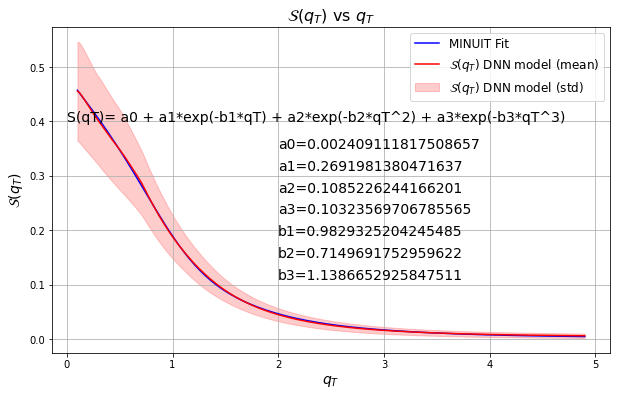

In [41]:
#### Formula 8 (F8) ######################
### Fit with S(qT)= a0 + a1*exp(-b1*qT) + a2*exp(-b2*qT^2) + a3*exp(-b3*qT^3) ########


import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT,a0,a1,a2,a3,b1,b2,b3):
    return a0 + a1*np.exp(-b1*qT) + a2*np.exp(-b2*qT**2) + a3*np.exp(-b3*qT**3)


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(a0,a1,a2,a3,b1,b2,b3):
    yth = model_function(qT,a0,a1,a2,a3,b1,b2,b3)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2

a0_guess = 0.4
a1_guess = 0.4  
a2_guess = 0.4  
a3_guess = 0.4
b1_guess = 0.4  
b2_guess = 0.4  
b3_guess = 0.4  
minuit = Minuit(chi2,a0=a0_guess,a1=a1_guess,a2=a2_guess,a3=a3_guess,b1=b1_guess,b2=b2_guess,b3=b3_guess)


minuit.migrad()
minuit.hesse()

a0_solution = minuit.values["a0"]
a1_solution = minuit.values["a1"]
a2_solution = minuit.values["a2"]
a3_solution = minuit.values["a3"]
b1_solution = minuit.values["b1"]
b2_solution = minuit.values["b2"]
b3_solution = minuit.values["b3"]


SqT_model = np.array(model_function(qT,a0_solution,a1_solution,a2_solution,a3_solution,b1_solution,b2_solution,b3_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.text(0.0,0.4,'S(qT)= a0 + a1*exp(-b1*qT) + a2*exp(-b2*qT^2) + a3*exp(-b3*qT^3)',fontsize=14)
plt.text(2.0,0.35,f'a0={a0_solution}',fontsize=14)
plt.text(2.0,0.31,f'a1={a1_solution}',fontsize=14)
plt.text(2.0,0.27,f'a2={a2_solution}',fontsize=14)
plt.text(2.0,0.23,f'a3={a3_solution}',fontsize=14)
plt.text(2.0,0.19,f'b1={b1_solution}',fontsize=14)
plt.text(2.0,0.15,f'b2={b2_solution}',fontsize=14)
plt.text(2.0,0.11,f'b3={b3_solution}',fontsize=14)
plt.plot(qT, SqT_model, label='MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_SqT_F8.pdf')

0.1580687641205187
0.3046068693741
0.7162622961457162


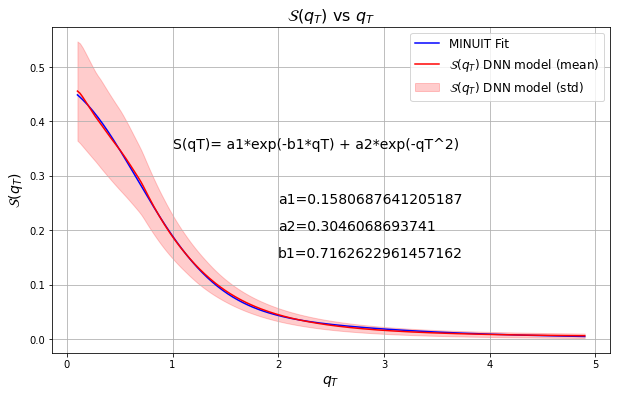

In [44]:
#### Formula 9 (F9) ######################
### Fit with S(qT)= a1*exp(-b1*qT) + a2*exp(-qT^2) ########


import pandas as pd
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt

def model_function(qT,a1,a2,b1):
    return a1*np.exp(-b1*qT) + a2*np.exp(-qT**2)


functions_results = pd.read_csv("comparison_results.csv")


qT = np.array(functions_results['qT'])
SqTmean = np.array(functions_results['SqT_mean'])
SqTstd = np.array(functions_results['SqT_std'])


def chi2(a1,a2,b1):
    yth = model_function(qT,a1,a2,b1)
    yexp = SqTmean
    yerr = SqTstd
    tempChi2=np.sum(((yth-yexp))**2)
    return tempChi2


a1_guess = 0.4  
a2_guess = 0.4  
a3_guess = 0.4
b1_guess = 0.4  
b2_guess = 0.4  
b3_guess = 0.4  
minuit = Minuit(chi2,a1=a1_guess,a2=a2_guess,b1=b1_guess)


minuit.migrad()
minuit.hesse()

a1_solution = minuit.values["a1"]
a2_solution = minuit.values["a2"]
b1_solution = minuit.values["b1"]

print(a1_solution)
print(a2_solution)
print(b1_solution)


SqT_model = np.array(model_function(qT,a1_solution,a2_solution,b1_solution))


# ####### Plot SqT ############
plt.figure(1,figsize=(10, 6))
plt.text(1.0,0.35,'S(qT)= a1*exp(-b1*qT) + a2*exp(-qT^2)',fontsize=14)
plt.text(2.0,0.25,f'a1={a1_solution}',fontsize=14)
plt.text(2.0,0.2,f'a2={a2_solution}',fontsize=14)
plt.text(2.0,0.15,f'b1={b1_solution}',fontsize=14)
plt.plot(qT, SqT_model, label='MINUIT Fit', linestyle='-', color='blue')
plt.plot(qT, SqTmean, label='$\mathcal{S}(q_T)$ DNN model (mean)', linestyle='-', color='red')
plt.fill_between(qT, SqTmean - SqTstd, SqTmean + SqTstd, color='red', alpha=0.2, label='$\mathcal{S}(q_T)$ DNN model (std)')
plt.xlabel(r'$q_T$', fontsize=14)
plt.ylabel(r'$\mathcal{S}(q_T)$', fontsize=14)
plt.title('$\mathcal{S}(q_T)$ vs $q_T$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('Fit_Results_for_SqT_F9.pdf')